# Problem statement :
Predict future values for the Data Stock Index using Time Series Analysis

##		IMPORT MODULES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
#plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.dtypes

DATE              int64
SP500           float64
NASDAQ.AAL      float64
NASDAQ.AAPL     float64
NASDAQ.ADBE     float64
NASDAQ.ADI      float64
NASDAQ.ADP      float64
NASDAQ.ADSK     float64
NASDAQ.AKAM     float64
NASDAQ.ALXN     float64
NASDAQ.AMAT     float64
NASDAQ.AMD      float64
NASDAQ.AMGN     float64
NASDAQ.AMZN     float64
NASDAQ.ATVI     float64
NASDAQ.AVGO     float64
NASDAQ.BBBY     float64
NASDAQ.BIIB     float64
NASDAQ.CA       float64
NASDAQ.CBOE     float64
NASDAQ.CELG     float64
NASDAQ.CERN     float64
NASDAQ.CHRW     float64
NASDAQ.CHTR     float64
NASDAQ.CINF     float64
NASDAQ.CMCSA    float64
NASDAQ.CME      float64
NASDAQ.COST     float64
NASDAQ.CSCO     float64
NASDAQ.CSX      float64
                 ...   
NYSE.USB        float64
NYSE.UTX        float64
NYSE.V          float64
NYSE.VAR        float64
NYSE.VFC        float64
NYSE.VLO        float64
NYSE.VMC        float64
NYSE.VNO        float64
NYSE.VTR        float64
NYSE.VZ         float64
NYSE.WAT        

#### Pick up the following stocks and generate forecasts accordingly

In [4]:
Stocks_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + Stocks_features
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
df1.loc[:,['DATE']] =  pd.to_datetime(df1['DATE'],unit='s').values

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
df1.tail()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
41261,2017-08-31 19:56:00,164.11,106.565,100.89,32.185,36.135
41262,2017-08-31 19:57:00,164.12,106.590,100.88,32.200,36.130
41263,2017-08-31 19:58:00,164.01,106.520,100.86,32.200,36.130
41264,2017-08-31 19:59:00,163.88,106.400,100.83,32.195,36.120
41265,2017-08-31 20:00:00,163.98,106.470,100.89,32.225,36.130


In [9]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [10]:
df1['Month'] = df1['DATE'].dt.date

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


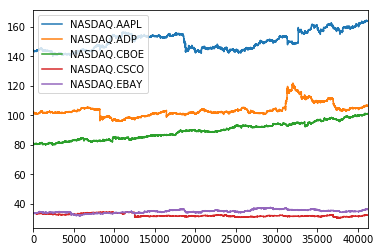

In [12]:
df1.plot()

In [12]:
col_list = ['Month']+ Stocks_features
df2 = df1[col_list]
df2.head()

,Month,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [13]:
df2.isnull().sum()

Month          0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [21]:
final.reset_index(inplace=True)

In [22]:
final = df2.copy()
final['Month']=pd.to_datetime(final['Month'])
final.set_index('Month',inplace=True)
final.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
Month,,,,,
2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [23]:
final.index

DatetimeIndex(['2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03',
               ...
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31'],
              dtype='datetime64[ns]', name='Month', length=41266, freq=None)

# Time Series Forecasting for NASDAQ.AAPL

In [25]:
ts = final['NASDAQ.AAPL']
ts['2017-08-31'].head()

Month
2017-08-31    163.67
2017-08-31    163.74
2017-08-31    163.61
2017-08-31    163.68
2017-08-31    163.97
Name: NASDAQ.AAPL, dtype: float64

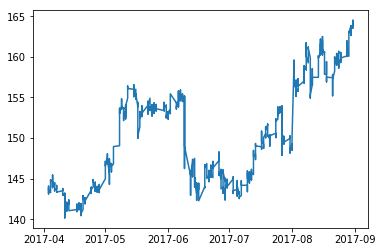

In [26]:
plt.plot(ts)

In [27]:
NASDAQ_AAPL  = final['NASDAQ.AAPL']
print(NASDAQ_AAPL.head())

Month
2017-04-03    143.6800
2017-04-03    143.7000
2017-04-03    143.6901
2017-04-03    143.6400
2017-04-03    143.6600
Name: NASDAQ.AAPL, dtype: float64


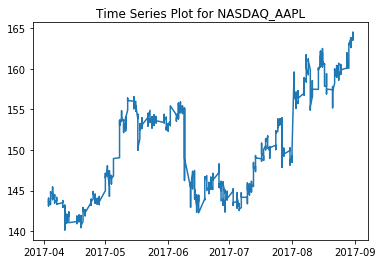

In [28]:
plt.plot(NASDAQ_AAPL)
plt.title('Time Series Plot for NASDAQ_AAPL')

plt.show()

#### Plotting Rolling Statistics :
    
The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

In [114]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(timeseries)
    print('\nAugmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


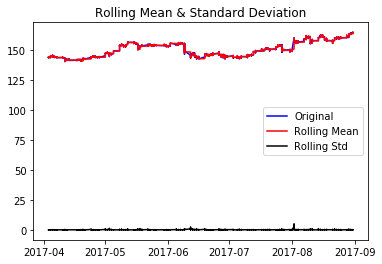


Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9128532997926723
p-value : 0.7837101772613848
#Lags Used : 31
Number of Observations Used : 41234
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [115]:
test_stationarity(ts)

#### Note:
This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.

• Note: the signed values are compared and the absolute values.

# MAKING THE TIME SERIES STATIONARY
There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

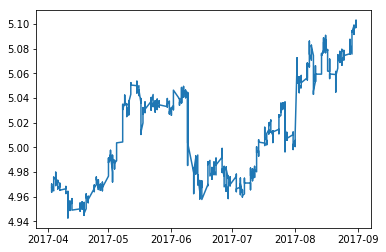

In [48]:
ts_log = np.log(ts)
plt.plot(ts_log)

#### Moving Average

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """Entry point for launching an IPython kernel.


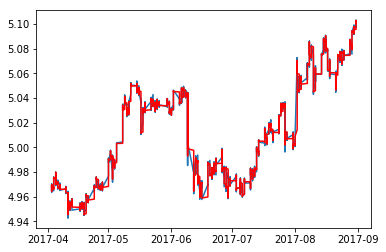

In [49]:
moving_average = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_average,color='red')

#### Now subtract the rolling mean from the original series

In [50]:
ts_log_moving_avg_diff = ts_log - moving_average
ts_log_moving_avg_diff.head(12)

Month
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03         NaN
2017-04-03    0.001356
Name: NASDAQ.AAPL, dtype: float64

In [51]:
ts_log_moving_avg_diff.dropna(inplace =True)
ts_log_moving_avg_diff.head(12)

Month
2017-04-03    0.001356
2017-04-03    0.000869
2017-04-03    0.001404
2017-04-03    0.001377
2017-04-03    0.001227
2017-04-03    0.000714
2017-04-03    0.000575
2017-04-03    0.000167
2017-04-03    0.000456
2017-04-03    0.000013
2017-04-03   -0.000601
2017-04-03   -0.000543
Name: NASDAQ.AAPL, dtype: float64

#### Note:
The reason there are null values is because we take the average of first 12 so 11 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis. 

#### Test Staionarity

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


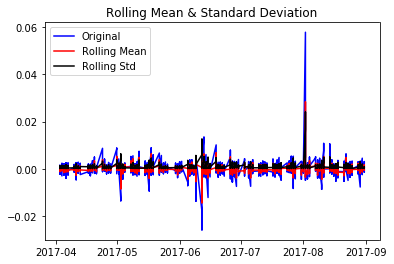

Test Statistic                   -29.889113
p-value                            0.000000
#Lags Used                        42.000000
Number of Observations Used    41212.000000
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
Critical Value (1%)               -3.430509
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [52]:
test_stationarity(ts_log_moving_avg_diff)

In [56]:
ts_log.index

DatetimeIndex(['2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03',
               ...
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31'],
              dtype='datetime64[ns]', name='Month', length=41266, freq=None)

#### Seasonal Decomposition

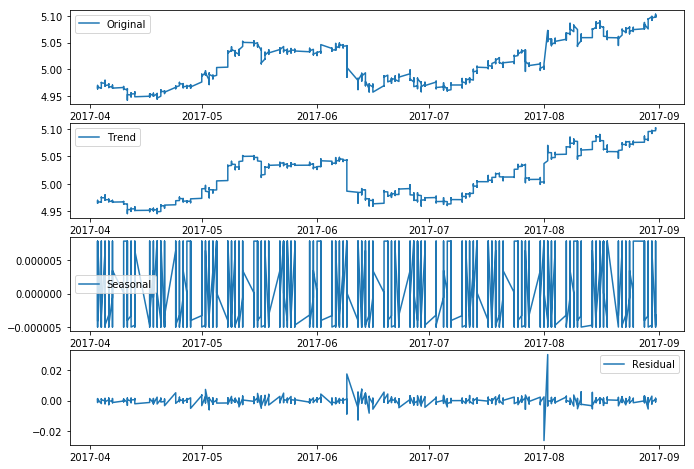

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


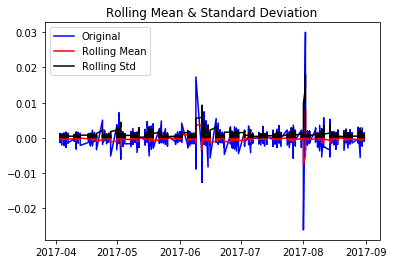

Test Statistic                   -43.171143
p-value                            0.000000
#Lags Used                        55.000000
Number of Observations Used    41198.000000
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
Critical Value (1%)               -3.430509
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [61]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Note :
This is stationary because:

• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time.

#### Forecasting a Time Series

#### Auto Regressive Integrated Moving Average(ARIMA) —

It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .

Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

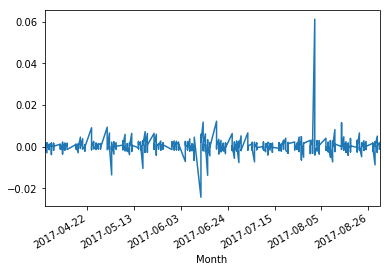

In [64]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot()

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


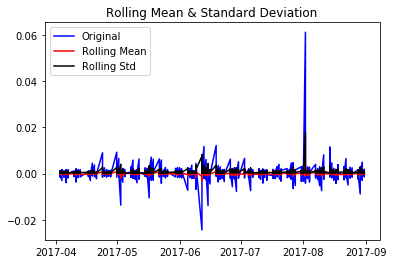

Test Statistic                   -35.706087
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    41234.000000
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
Critical Value (1%)               -3.430509
dtype: float64
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [65]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [85]:
lag_acf = acf(ts_log_diff,nlags=80)
lag_pacf = pacf(ts_log_diff,nlags=80,method='ols')

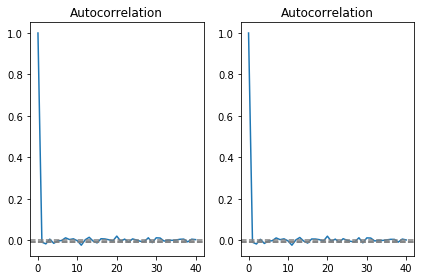

In [84]:
plt.subplot(121)

plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)
#plt.figure(figsize=(11,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.tight_layout()

#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:

• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.

• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

In [108]:
# fit model
model = ARIMA(final['NASDAQ.AAPL'].values, order=(0,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())
print(model_fit.forecast())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(0, 1, 0)   Log Likelihood               39216.864
Method:                           css   S.D. of innovations              0.094
Date:                Sun, 30 Sep 2018   AIC                         -78429.728
Time:                        20:46:15   BIC                         -78412.472
Sample:                             1   HQIC                        -78424.274
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.068      0.285      -0.000       0.001
(array([163.98049194]), array([0.09354574]), array([[163.79714567, 164.16383822]]))


In [95]:
y_pred = model_fit.fittedvalues

In [98]:
df_pred = pd.DataFrame(ts_log_diff)

In [100]:
df_pred['predictions'] = y_pred

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_pred['NASDAQ.AAPL'],df_pred['predictions']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_pred['NASDAQ.AAPL'],df_pred['predictions']))

Mean Squared Error NASDAQ.AAPL - 6.207355575243097e-07
Mean Absolute Error NASDAQ.AAPL - 0.0005648838028155984


Text(0.5,1,'Forecast for NASDAQ.AAPL ')

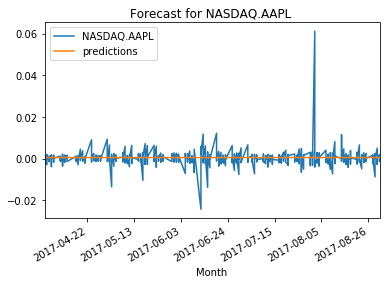

In [122]:
df_pred.plot()
plt.title('Forecast for NASDAQ.AAPL ')

In [89]:
print('RSS : ',sum(model_fit.fittedvalues - ts_log_diff)**2)

RSS :  406.74117017268543


In [117]:
final.columns

Index(['NASDAQ.AAPL', 'NASDAQ.ADP', 'NASDAQ.CBOE', 'NASDAQ.CSCO',
       'NASDAQ.EBAY'],
      dtype='object')

# Time Series Forecasting for NASDAQ.ADP

In [123]:
ts = final['NASDAQ.ADP']
ts['2017-08-31'].head()

Month
2017-08-31    106.4900
2017-08-31    106.0501
2017-08-31    106.0500
2017-08-31    106.1500
2017-08-31    106.3700
Name: NASDAQ.ADP, dtype: float64

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


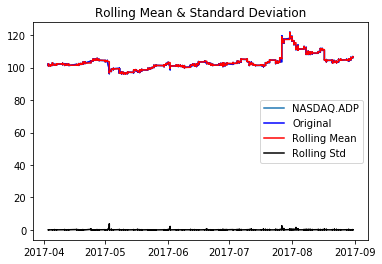


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7041735251574455
p-value : 0.42896344420670196
#Lags Used : 39
Number of Observations Used : 41226
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Month
2017-04-03    0.000528
2017-04-03    0.000398
2017-04-03    0.000650
2017-04-03    0.000661
2017-04-03    0.000155
2017-04-03    0.000155
2017-04-03   -0.000864
2017-04-03   -0.001125
2017-04-03   -0.000872
2017-04-03   -0.000978
2017-04-03   -0.000473
2017-04-03   -0.000195
Name: NASDAQ.ADP, dtype: float64

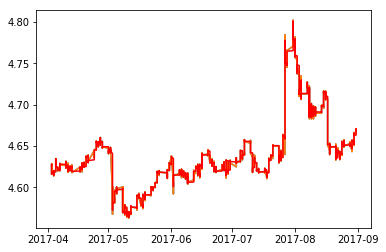

In [124]:
plt.plot(ts)
test_stationarity(ts)
ts_log = np.log(ts)
plt.plot(ts_log)
moving_average = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_average,color='red')
#Now subtract the rolling mean from the original series

ts_log_moving_avg_diff = ts_log - moving_average
ts_log_moving_avg_diff.head(12)

ts_log_moving_avg_diff.dropna(inplace =True)
ts_log_moving_avg_diff.head(12)

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


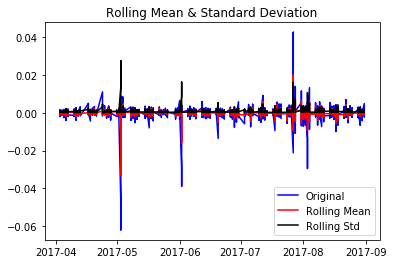


Augmented Dickey-Fuller Test:
ADF Test Statistic : -28.806662246736973
p-value : 0.0
#Lags Used : 40
Number of Observations Used : 41214
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [125]:
#Test Staionarity
test_stationarity(ts_log_moving_avg_diff)

#### Seasonal Decomposition

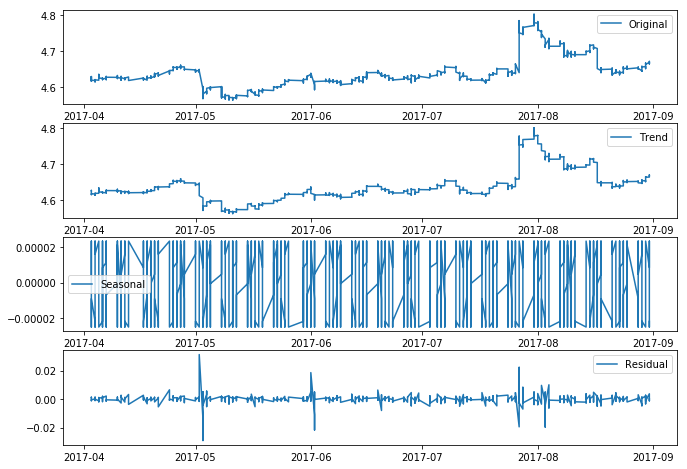

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


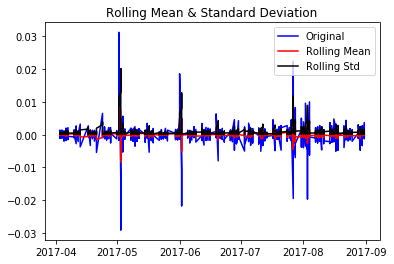


Augmented Dickey-Fuller Test:
ADF Test Statistic : -45.832686146804214
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41198
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [127]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


#### Note :
This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


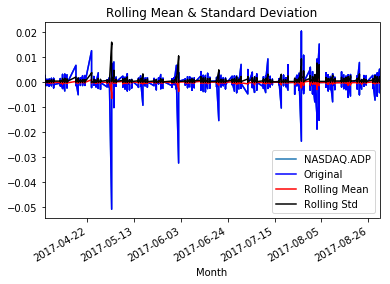


Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.76041440958716
p-value : 0.0
#Lags Used : 39
Number of Observations Used : 41225
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [128]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot()

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

lag_acf = acf(ts_log_diff,nlags=80)
lag_pacf = pacf(ts_log_diff,nlags=80,method='ols')

#### Autocorrelation and Partial Corelation plot

Text(0.5,1,'Partial Autocorrelation')

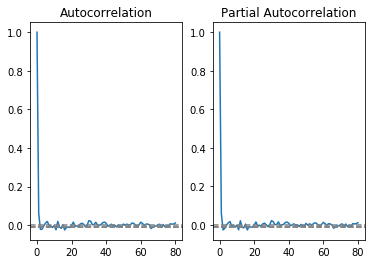

In [129]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)
#plt.figure(figsize=(11,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')


#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(0, 1, 0)   Log Likelihood               39216.864
Method:                           css   S.D. of innovations              0.094
Date:                Sun, 30 Sep 2018   AIC                         -78429.728
Time:                        21:27:04   BIC                         -78412.472
Sample:                             1   HQIC                        -78424.274
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.068      0.285      -0.000       0.001
(array([163.98049194]), array([0.09354574]), array([[163.79714567, 164.16383822]]))


Text(0.5,1,'Forecast for NASDAQ.ADP')

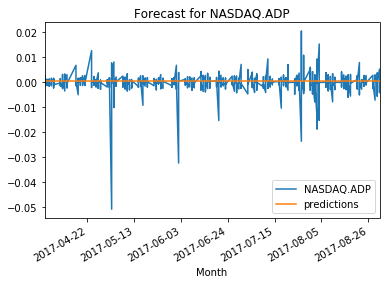

In [130]:
# fit model
model = ARIMA(final['NASDAQ.AAPL'].values, order=(0,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())
print(model_fit.forecast())

y_pred = model_fit.fittedvalues
df_pred = pd.DataFrame(ts_log_diff)
df_pred['predictions'] = y_pred

df_pred.plot()
plt.title('Forecast for NASDAQ.ADP')

In [131]:
df_pred.head()

,NASDAQ.ADP,predictions
Month,,
2017-04-03,-0.000881,0.000492
2017-04-03,0.000710,0.000492
2017-04-03,-0.000710,0.000492
2017-04-03,-0.000784,0.000492
2017-04-03,-0.000196,0.000492


In [132]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_pred['NASDAQ.ADP'],df_pred['predictions']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_pred['NASDAQ.ADP'],df_pred['predictions']))

Mean Squared Error NASDAQ.AAPL - 7.29667178911003e-07
Mean Absolute Error NASDAQ.AAPL - 0.0005796739333350525


# Times Series Forecasting for 'NASDAQ.CBOE'

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


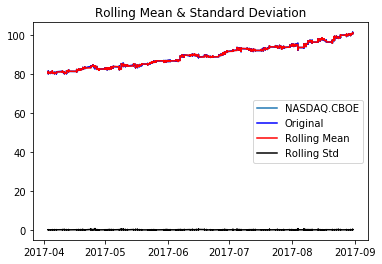


Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.16633930282615345
p-value : 0.9703092030510077
#Lags Used : 27
Number of Observations Used : 41238
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  


Month
2017-04-03    0.000334
2017-04-03    0.000344
2017-04-03    0.001370
2017-04-03    0.002640
2017-04-03    0.001677
2017-04-03   -0.000544
2017-04-03   -0.002702
2017-04-03   -0.002618
2017-04-03   -0.002309
2017-04-03   -0.002050
2017-04-03   -0.001185
2017-04-03   -0.001051
Name: NASDAQ.CBOE, dtype: float64

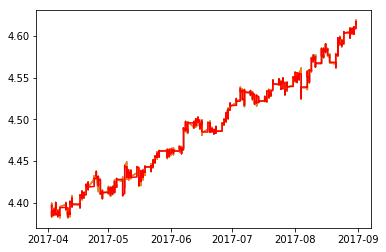

In [134]:
ts = final['NASDAQ.CBOE']
plt.plot(ts)
#test Stationarity
test_stationarity(ts)
ts_log = np.log(ts)
plt.plot(ts_log)
moving_average = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_average,color='red')
#Now subtract the rolling mean from the original series

ts_log_moving_avg_diff = ts_log - moving_average
ts_log_moving_avg_diff.head(12)

ts_log_moving_avg_diff.dropna(inplace =True)
ts_log_moving_avg_diff.head(12)

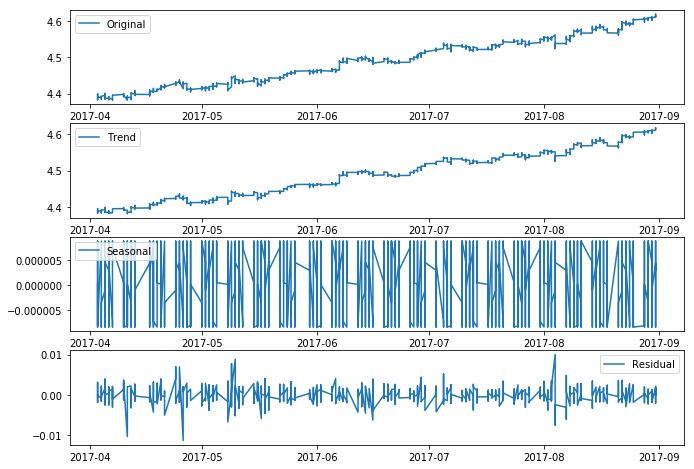

In [135]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


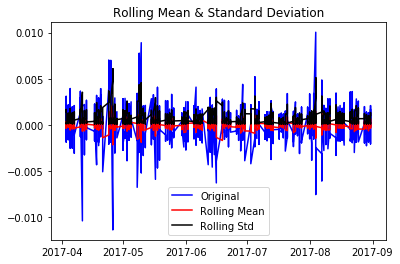


Augmented Dickey-Fuller Test:
ADF Test Statistic : -46.17593601006184
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41198
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [136]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Note :
This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


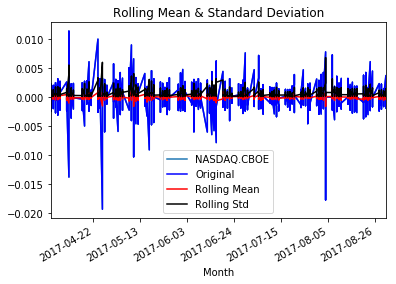


Augmented Dickey-Fuller Test:
ADF Test Statistic : -42.1831718330024
p-value : 0.0
#Lags Used : 25
Number of Observations Used : 41239
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [137]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot()

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

lag_acf = acf(ts_log_diff,nlags=80)
lag_pacf = pacf(ts_log_diff,nlags=80,method='ols')

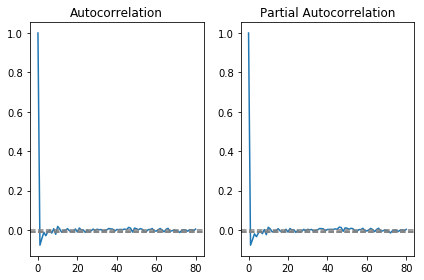

In [138]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)
#plt.figure(figsize=(11,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()


#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(0, 1, 0)   Log Likelihood               67966.781
Method:                           css   S.D. of innovations              0.047
Date:                Sun, 30 Sep 2018   AIC                        -135929.562
Time:                        21:36:15   BIC                        -135912.306
Sample:                             1   HQIC                       -135924.108
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      2.098      0.036    3.16e-05       0.001
(array([100.89048128]), array([0.04660632]), array([[100.79913457, 100.98182799]]))
Mean Squared Error NASDAQ.CBOE - 5.027309862275

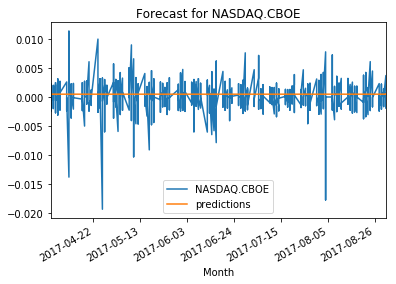

In [140]:
# fit model
model = ARIMA(final['NASDAQ.CBOE'].values, order=(0,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())
print(model_fit.forecast())

y_pred = model_fit.fittedvalues
df_pred = pd.DataFrame(ts_log_diff)
df_pred['predictions'] = y_pred

df_pred.plot()
plt.title('Forecast for NASDAQ.CBOE')


from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CBOE -', mean_squared_error(df_pred['NASDAQ.CBOE'],df_pred['predictions']))
print('Mean Absolute Error NASDAQ.CBOE -', mean_absolute_error(df_pred['NASDAQ.CBOE'],df_pred['predictions']))

In [141]:
df_pred.head()

,NASDAQ.CBOE,predictions
Month,,
2017-04-03,0.002219,0.000481
2017-04-03,0.000000,0.000481
2017-04-03,-0.000986,0.000481
2017-04-03,-0.000123,0.000481
2017-04-03,0.001232,0.000481


# Time Series ForeCasting for 'NASDAQ.CSCO'

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


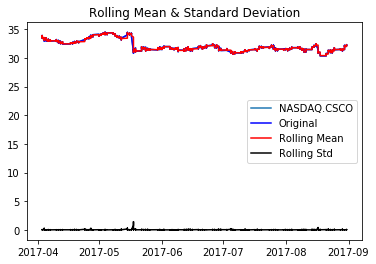


Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.395554610889459
p-value : 0.14299501995164532
#Lags Used : 47
Number of Observations Used : 41218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  


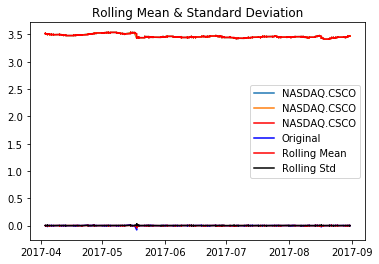


Augmented Dickey-Fuller Test:
ADF Test Statistic : -27.967317241852648
p-value : 0.0
#Lags Used : 47
Number of Observations Used : 41207
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [143]:
ts = final['NASDAQ.CSCO']

plt.plot(ts)
#Test Staionarity
test_stationarity(ts)
ts_log = np.log(ts)
plt.plot(ts_log)
moving_average = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_average,color='red')
#Now subtract the rolling mean from the original series

ts_log_moving_avg_diff = ts_log - moving_average
ts_log_moving_avg_diff.head(12)

ts_log_moving_avg_diff.dropna(inplace =True)
ts_log_moving_avg_diff.head(12)

#Test Staionarity
test_stationarity(ts_log_moving_avg_diff)

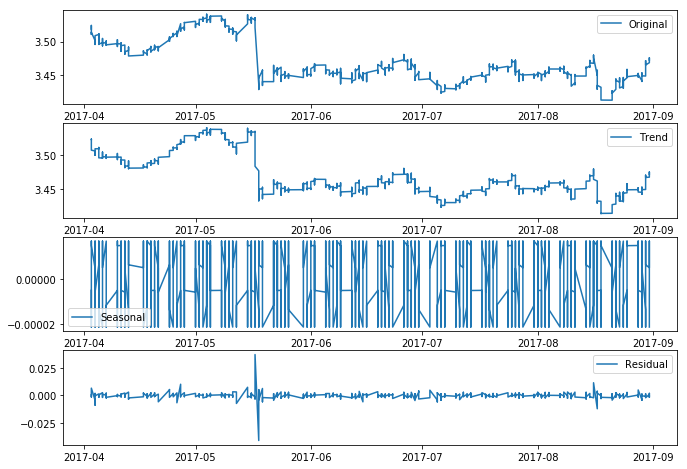

In [144]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


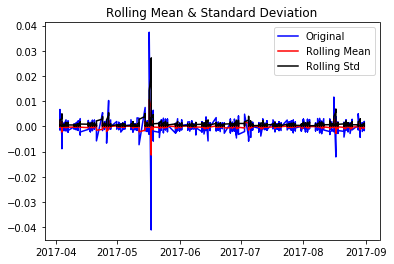


Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.94335076033945
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41198
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [145]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Note :
This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


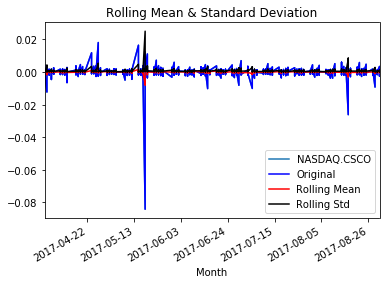


Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.37240421785041
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [146]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot()

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

lag_acf = acf(ts_log_diff,nlags=80)
lag_pacf = pacf(ts_log_diff,nlags=80,method='ols')


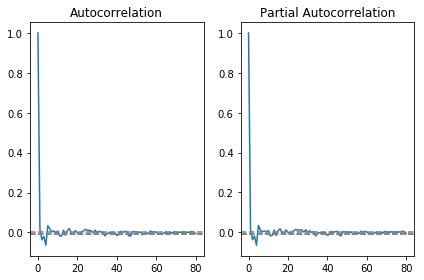

In [147]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)
#plt.figure(figsize=(11,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()



#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(0, 1, 0)   Log Likelihood               39216.864
Method:                           css   S.D. of innovations              0.094
Date:                Sun, 30 Sep 2018   AIC                         -78429.728
Time:                        21:51:11   BIC                         -78412.472
Sample:                             1   HQIC                        -78424.274
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.068      0.285      -0.000       0.001
(array([163.98049194]), array([0.09354574]), array([[163.79714567, 164.16383822]]))


Text(0.5,1,'Forecast for NASDAQ.CSCO')

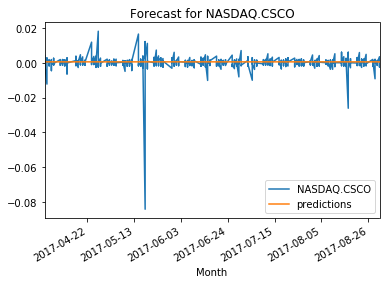

In [150]:
# fit model
model = ARIMA(final['NASDAQ.AAPL'].values, order=(0,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())
print(model_fit.forecast())

y_pred = model_fit.fittedvalues
df_pred = pd.DataFrame(ts_log_diff)
df_pred['predictions'] = y_pred

df_pred.plot()
plt.title('Forecast for NASDAQ.CSCO')

In [149]:
df_pred.tail()

,NASDAQ.CSCO,predictions
Month,,
2017-08-31,0.000466,0.000492
2017-08-31,0.000466,0.000492
2017-08-31,0.000000,0.000492
2017-08-31,-0.000155,0.000492
2017-08-31,0.000931,0.000492


In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CSCO -', mean_squared_error(df_pred['NASDAQ.CSCO'],df_pred['predictions']))
print('Mean Absolute Error NASDAQ.CSCO -', mean_absolute_error(df_pred['NASDAQ.CSCO'],df_pred['predictions']))

Mean Squared Error NASDAQ.CSCO - 6.831166613409014e-07
Mean Absolute Error NASDAQ.CSCO - 0.000558567695988521


# Time Series Forecasting for NASDAQ.EBAY

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


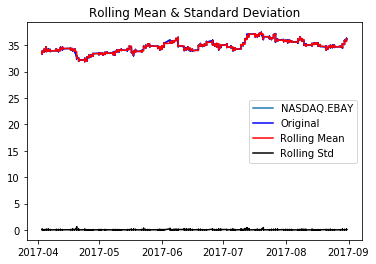


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.875761635941462
p-value : 0.343548087802453
#Lags Used : 47
Number of Observations Used : 41218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  


Month
2017-04-03    0.005991
2017-04-03    0.006895
2017-04-03    0.007371
2017-04-03    0.006133
2017-04-03    0.005003
2017-04-03    0.003628
2017-04-03    0.002366
2017-04-03    0.001634
2017-04-03    0.002421
2017-04-03    0.001815
2017-04-03    0.000482
2017-04-03    0.000025
Name: NASDAQ.EBAY, dtype: float64

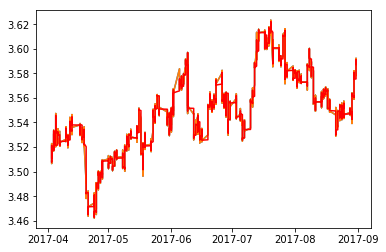

In [154]:
ts = final['NASDAQ.EBAY']
plt.plot(ts)
test_stationarity(ts)
ts_log = np.log(ts)
plt.plot(ts_log)
moving_average = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_average,color='red')
#Now subtract the rolling mean from the original series

ts_log_moving_avg_diff = ts_log - moving_average
ts_log_moving_avg_diff.head(12)

ts_log_moving_avg_diff.dropna(inplace =True)
ts_log_moving_avg_diff.head(12)

C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


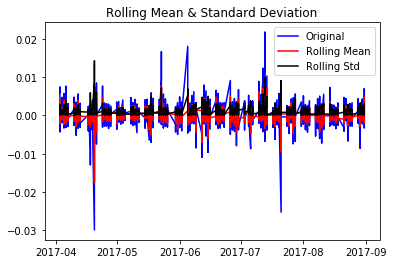


Augmented Dickey-Fuller Test:
ADF Test Statistic : -29.676344709787212
p-value : 0.0
#Lags Used : 43
Number of Observations Used : 41211
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [155]:
#Test Staionarity
test_stationarity(ts_log_moving_avg_diff)

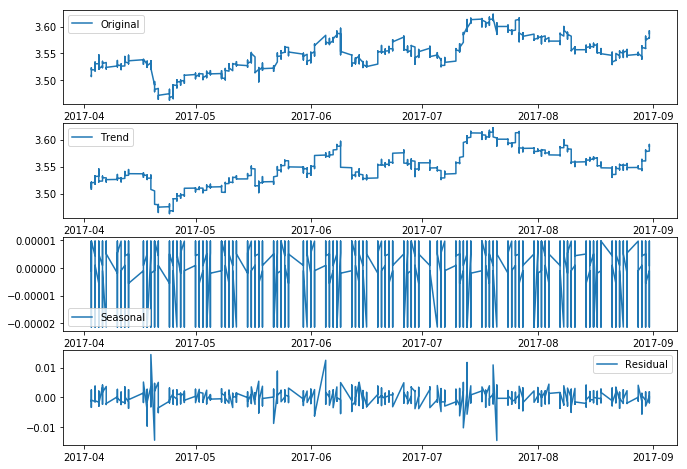

In [156]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


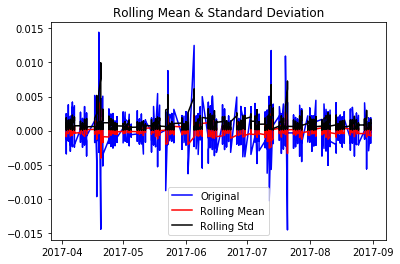


Augmented Dickey-Fuller Test:
ADF Test Statistic : -44.827560144779284
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41198
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [157]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


#### Note :
This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time


C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """
C:\Users\INTEL\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()
  


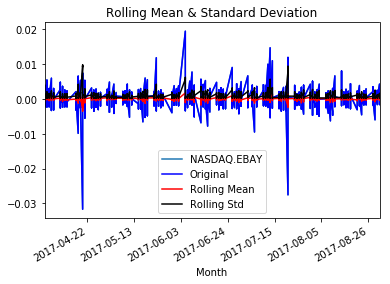


Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.656363444917474
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [158]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot()

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

lag_acf = acf(ts_log_diff,nlags=80)
lag_pacf = pacf(ts_log_diff,nlags=80,method='ols')

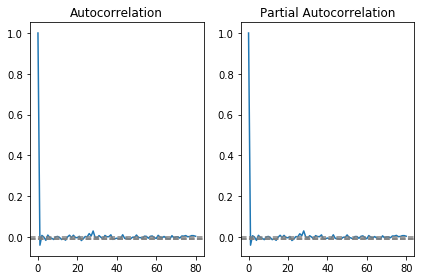

In [159]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)
#plt.figure(figsize=(11,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()


#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41265
Model:                 ARIMA(0, 1, 0)   Log Likelihood               96692.967
Method:                           css   S.D. of innovations              0.023
Date:                Sun, 30 Sep 2018   AIC                        -193381.935
Time:                        22:00:02   BIC                        -193364.679
Sample:                             1   HQIC                       -193376.481
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.622e-05      0.000      0.579      0.563      -0.000       0.000
(array([36.13006622]), array([0.02323354]), array([[36.08452932, 36.17560312]]))


Text(0.5,1,'Forecast for NASDAQ.EBAY')

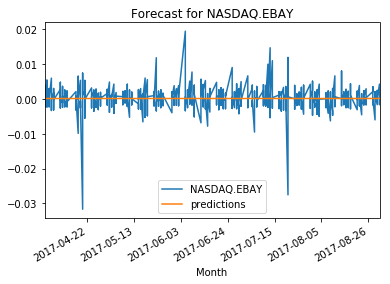

In [162]:
# fit model
model = ARIMA(final['NASDAQ.EBAY'].values, order=(0,1,0))
model_fit = model.fit(disp=-1)
print(model_fit.summary())
print(model_fit.forecast())

y_pred = model_fit.fittedvalues
df_pred = pd.DataFrame(ts_log_diff)
df_pred['predictions'] = y_pred

df_pred.plot()
plt.title('Forecast for NASDAQ.EBAY')

In [161]:
df_pred.head()

,NASDAQ.EBAY,predictions
Month,,
2017-04-03,-0.000075,0.000492
2017-04-03,0.000449,0.000492
2017-04-03,-0.002247,0.000492
2017-04-03,0.001948,0.000492
2017-04-03,0.000898,0.000492


In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.EBAY -', mean_squared_error(df_pred['NASDAQ.EBAY'],df_pred['predictions']))
print('Mean Absolute Error NASDAQ.EBAY -', mean_absolute_error(df_pred['NASDAQ.EBAY'],df_pred['predictions']))

Mean Squared Error NASDAQ.EBAY - 4.47637254766618e-07
Mean Absolute Error NASDAQ.EBAY - 0.00040651890616239493
